# Chap 4 - Classification

- [Load dataset](#Load-dataset)
- [The Default data set](#Figure-4.1---Default-data-set)
- [4.3 Logistic Regression](#4.3-Logistic-Regression)
- [4.4 Linear Discriminant Analysis](#4.4-Linear-Discriminant-Analysis)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

### Load dataset

In [2]:
df = pd.read_excel('Data/Default.xlsx')
# categorize the data
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
1,No,No,729.526495,44361.625074,0,0
2,No,Yes,817.180407,12106.134700,0,1
3,No,No,1073.549164,31767.138947,0,0


### Figure 4.1 - Default data set

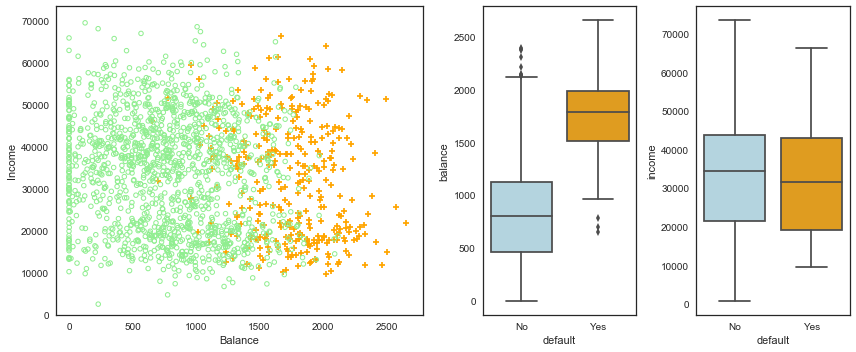

In [16]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0, -2])
ax3 = plt.subplot(gs[0, -1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.default2==0].sample(frac=0.15)
# Take all samples where target values is yes
df_yes = df[df.default2==1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default=='Yes'].balance, df_[df_.default=='Yes'].income, s=40, c='orange',
           marker='+', linewidths=1)
ax1.scatter(df_[df_.default=='No'].balance, df_[df_.default=='No'].income, s=20, edgecolor='lightgreen',
           marker='o', linewidths=1, facecolors='none')
ax1.set_ylim(ymin=0)
ax1.set_ylabel("Income")
ax1.set_xlim(xmin=-100)
ax1.set_xlabel("Balance")

c_palette = {'No':'lightblue','Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf());

## 4.3 Logistic Regression

### Figure 4.2

C:\Users\wei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


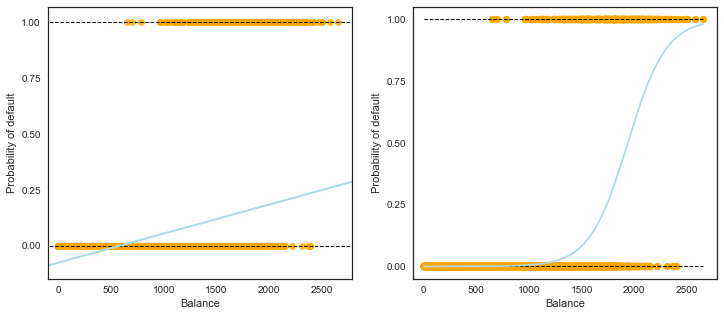

In [24]:
X_train = df.balance.reshape(-1,1)
y = df.default2

# Create array of test data. Calculate the probs.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train, y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# left plot
sns.regplot(df.balance, df.default2, order=1,ci=None, scatter_kws={'color':'orange'},
           line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel("Probability of default")
    ax.set_xlabel("Balance")
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_xlim(xmin=-100)

In [19]:
X_test

array([[  0.00000000e+00],
       [  1.00000000e+00],
       [  2.00000000e+00],
       ..., 
       [  2.65200000e+03],
       [  2.65300000e+03],
       [  2.65400000e+03]])

#### scikit-learn

In [26]:
print(clf)
print("classes: ", clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept: ', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)
classes:  [0 1]
coefficients:  [[ 0.00549891]]
intercept:  [-10.65132324]


#### statsmodels

In [28]:
# You should handle with X_train data
X_train = sm.add_constant(df.balance)
est = smf.Logit(y.ravel(), X_train).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
const,-10.6513,0.361,-29.491,0.000,-11.359,-9.943
balance,0.0055,0.000,24.952,0.000,0.005,0.006


In [30]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 06 Jan 2018   Pseudo R-squ.:                  0.4534
Time:                        16:20:51   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Table 4.3 - Multiple Logistic Regression

In [34]:
X_train = sm.add_constant(df[['balance','income','student2']])
est = smf.Logit(y, X_train).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
const,-10.8690,0.492,-22.079,0.000,-11.834,-9.904
balance,0.0057,0.000,24.737,0.000,0.005,0.006
income,3.033e-06,8.2e-06,0.370,0.712,-1.3e-05,1.91e-05
student2,-0.6468,0.236,-2.738,0.006,-1.110,-0.184


### Figure 4.3 - Confounding

In [42]:
# Balance and default vectors for students
X_train = df[df.student=='Yes'].balance.values.reshape(df[df.student=='Yes'].balance.size,1)
y = df[df.student=='Yes'].default2

X_train2 = df[df.student=='No'].balance.values.reshape(df[df.student=='No'].balance.size,1)
y2 = df[df.student=='No'].default2

# Vector with balance values for curve plot
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1, 1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train, y)
clf2.fit(X_train2, y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [43]:
# view the data
df.groupby(['student', 'default']).size()

student  default
No       No         6850
         Yes         206
Yes      No         2817
         Yes         127
dtype: int64

In [51]:
df.groupby(['student', 'default']).size().unstack()

default,No,Yes
student,,
No,6850,206
Yes,2817,127


In [46]:
prob

array([[  9.99986676e-01,   1.33242518e-05],
       [  9.99986601e-01,   1.33990650e-05],
       [  9.99986526e-01,   1.34742983e-05],
       ..., 
       [  2.60046443e-02,   9.73995356e-01],
       [  2.58632016e-02,   9.74136798e-01],
       [  2.57225079e-02,   9.74277492e-01]])

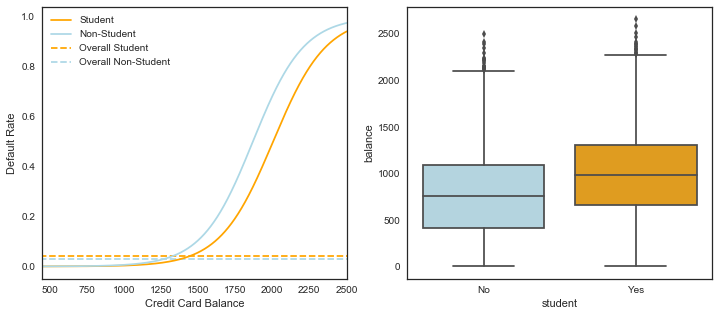

In [49]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-Student')
ax1.hlines(127/(127+2817), colors='orange', label='Overall Student',
          xmin=ax1.xaxis.get_data_interval()[0],
            xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/(206+6850), colors='lightblue', label='Overall Non-Student',
          xmin=ax1.xaxis.get_data_interval()[0],
            xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_xlim(450, 2500)
ax1.legend()

# Right plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2, palette=c_palette);


## 4.4 Linear Discriminant Analysis

In [54]:
X = df[['balance','income', 'student2']].as_matrix()
y = df.default2.as_matrix()

lda = LinearDiscriminantAnalysis(solver='svd')
ypred = lda.fit(X, y).predict(X)
df_result = pd.DataFrame({'True default status':y, 
                         'Predicted result':ypred})

In [55]:
df_result.head(3)

,Predicted result,True default status
0,0,0
1,0,0
2,0,0


In [59]:
df_result.replace(to_replace={0:'No',1:'Yes'}, inplace=True)
df_result.head(3)

,Predicted result,True default status
0,No,No
1,No,No
2,No,No


In [61]:
df_result.groupby(['Predicted result', 'True default status']).size().unstack('Predicted result')

Predicted result,No,Yes
True default status,,
No,9645,22
Yes,254,79


In [64]:
print(classification_report(y, ypred, target_names=['No', 'Yes']))

             precision    recall  f1-score   support

         No       0.97      1.00      0.99      9667
        Yes       0.78      0.24      0.36       333

avg / total       0.97      0.97      0.97     10000



In [65]:
lda.decision_function

<bound method LinearClassifierMixin.decision_function of LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)>

In [68]:
confusion_matrix(y, ypred)

array([[9645,   22],
       [ 254,   79]])